In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4a143099ac86b5959290699f4a3168fc81857968a85abd27ba0dcb2f7d1c61b4
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khởi tạo các biến đầu vào và đầu ra của hệ thống điều khiển mờ
distance = ctrl.Antecedent(np.arange(0, 51, 1), 'distance')
angle = ctrl.Antecedent(np.arange(-90, 91, 1), 'angle')
velocity = ctrl.Consequent(np.arange(0, 51, 1), 'velocity')

# Tạo các hàm mức độ (membership functions) cho các biến đầu vào và đầu ra
distance['near'] = fuzz.trimf(distance.universe, [0, 0, 25])
distance['far'] = fuzz.trimf(distance.universe, [0, 50, 50])
angle['left'] = fuzz.trimf(angle.universe, [-90, -90, 0])
angle['right'] = fuzz.trimf(angle.universe, [0, 90, 90])
velocity['slow'] = fuzz.trimf(velocity.universe, [0, 0, 25])
velocity['fast'] = fuzz.trimf(velocity.universe, [0, 50, 50])

# Tạo các quy tắc điều khiển mờ
rule1 = ctrl.Rule(distance['near'] & angle['left'], velocity['fast'])
rule2 = ctrl.Rule(distance['near'] & angle['right'], velocity['slow'])
rule3 = ctrl.Rule(distance['far'] & angle['left'], velocity['slow'])
rule4 = ctrl.Rule(distance['far'] & angle['right'], velocity['fast'])

# Tạo bộ điều khiển mờ và gán các quy tắc điều khiển mờ vào
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Tạo một bộ mô phỏng để thử nghiệm các giá trị đầu vào và xem kết quả đầu ra
velocity_simulation = ctrl.ControlSystemSimulation(velocity_ctrl)

# Thiết lập giá trị đầu vào cho các biến đầu vào của hệ thống điều khiển mờ
velocity_simulation.input['distance'] = 10
velocity_simulation.input['angle'] = -45

# Chạy bộ mô phỏng và lấy giá trị đầu ra của biến đầu ra
velocity_simulation.compute()
print(velocity_simulation.output['velocity'])


29.17721518987342


86.93181818181817


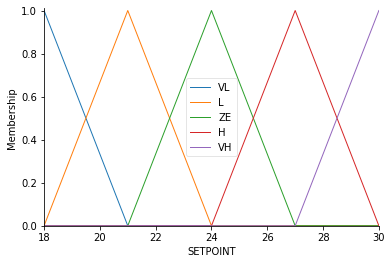

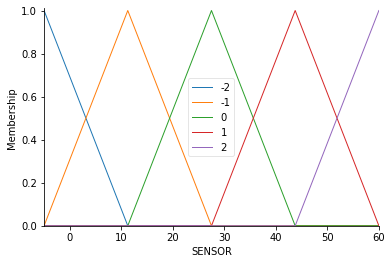

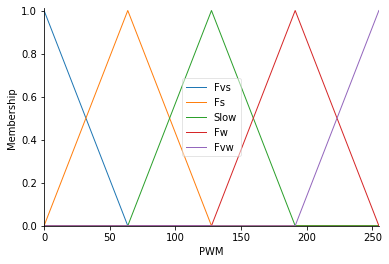

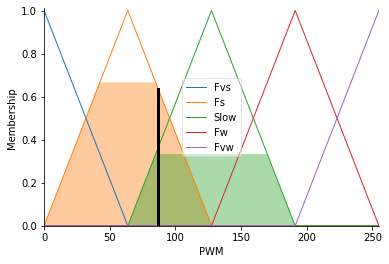

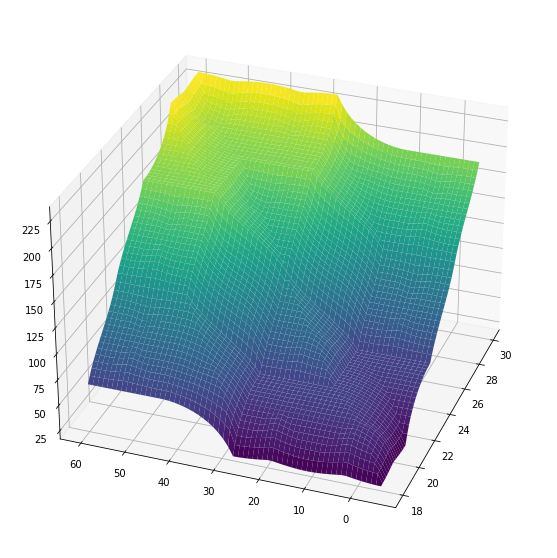

In [ ]:
# điều khiển động cơ DC

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universea = np.linspace(18,30,61)
universeda = np.linspace(-5,60,61)
universe1 = np.linspace(0,255,61)
#Input
SETPOINT=ctrl.Antecedent(universea,'SETPOINT')
SENSOR=ctrl.Antecedent(universeda,'SENSOR')
#Output
PWM=ctrl.Consequent(universe1,'PWM')

nameS=['VL','L','ZE','H','VH']
nameVS=['-2','-1','0','1','2']
namesT=['Fvs','Fs','Slow','Fw','Fvw']

SETPOINT.automf(names=nameS)
SENSOR.automf(names=nameVS)
PWM.automf(names=namesT)

SETPOINT.view()
SENSOR.view()
PWM.view()

rule = []

rule.append(ctrl.Rule(antecedent=((SETPOINT['VL'] & SENSOR['-2'])|(SETPOINT['VL'] & SENSOR['-1'])|(SETPOINT['VL'] & SENSOR['0'])|
                                  (SETPOINT['L'] & SENSOR['-2'])),consequent=PWM['Fvs'],label='rule Fvs'))
rule.append(ctrl.Rule(antecedent=((SETPOINT['ZE'] & SENSOR['-2'])|(SETPOINT['L'] & SENSOR['-1'])|(SETPOINT['ZE'] & SENSOR['-1'])|
                                  (SETPOINT['L'] & SENSOR['0'])|(SETPOINT['VL'] & SENSOR['1'])|(SETPOINT['VL'] & SENSOR['2'])),consequent=PWM['Fs'],label='rule Fs'))
rule.append(ctrl.Rule(antecedent=((SETPOINT['H'] & SENSOR['-2'])|(SETPOINT['H'] & SENSOR['-1'])|(SETPOINT['ZE'] & SENSOR['0'])|
                                  (SETPOINT['L'] & SENSOR['1'])|(SETPOINT['L'] & SENSOR['2'])),consequent=PWM['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((SETPOINT['VH'] & SENSOR['-2'])|(SETPOINT['VH'] & SENSOR['-1'])|(SETPOINT['H'] & SENSOR['0'])|
                                  (SETPOINT['H'] & SENSOR['1'])|(SETPOINT['ZE'] & SENSOR['1'])|(SETPOINT['ZE'] & SENSOR['2'])),consequent=PWM['Fw'],label='rule Fw'))
rule.append(ctrl.Rule(antecedent=((SETPOINT['VH'] & SENSOR['0'])|(SETPOINT['VH'] & SENSOR['1'])|(SETPOINT['VH'] & SENSOR['2'])|
                                  (SETPOINT['H'] & SENSOR['2'])),consequent=PWM['Fvw'],label='rule Fvw'))
#Control system
F_ctrl = ctrl.ControlSystem(rule)
Force_sim=ctrl.ControlSystemSimulation(F_ctrl)

Force_sim.input['SETPOINT'] = 25
Force_sim.input['SENSOR'] = 0
Force_sim.compute()
print(Force_sim.output['PWM'])
PWM.view(sim = Force_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(18,30,61)
upsampled2=np.linspace(-5,60,61)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    d_simulation.input['SETPOINT']=x[i,j]
    d_simulation.input['SENSOR']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['PWM']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)